# Assignment1_Haberman's_Survival_Data_Set
1.The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

2.In this assignment I am trying to show different plotting techniques and their observations

# Brief about Dataset


1.Dataset has four features a)age b)year c)nodes d)status 



2.age feature shows age of pateint,Year shows at which year operation is performed,nodes shows number of lymph nodes removed during surgery,status shows the patient survived 5 years or longer

# Domain knowledge

### 1. lymph node.
Ans: Lymph nodes are major sites of B and T lymphocytes, and other white blood cells. Lymph nodes are important for the proper functioning of the immune system, acting as filters for foreign particles and cancer cells. Lymph nodes do not have a detoxification function, which is primarily dealt with by the liver and kidneys[1]


### 2. Why to remove lymph node
Ans: If breast cancer spreads, it typically goes first to nearby lymph nodes. Knowing whether the cancer has spread to your lymph nodes helps medical providers find the best way to treat your cancer.
If you have been diagnosed with breast cancer, it’s important to find out how far the cancer has spread. To help find out if the cancer has spread beyond the breast, one or more of the lymph nodes under the arm (axillary lymph nodes) are removed[2]

# Basic statistics on dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1'''

#Load .csv into a pandas dataFrame.

hdata = pd.read_csv("haberman.csv")
print("first 3 rows data of dataset")
print("="*100)
hdata.head(3)

first 3 rows data of dataset


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [4]:
# finding number of rows and coumns in dataset with shape
print("Shape of dataset")
print("="*100)
print(hdata.shape)

Shape of dataset
(306, 4)


In [4]:
#(Q) What are the column names in our dataset?
print("columns of dataset")
print("="*100)
print(hdata.columns)

columns of dataset
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
#survival and death count  1 = the patient survived 5 years or longer 2 = the patient died within 5 year
print("1 = the patient survived 5 years or longer 2 = the patient died within 5 year")
print("="*100)
print("75% of data shows survival patents and 25% of data shows usurvival of pateints ")
print("It is imbalanced dataset for predicting next case")
hdata.status.value_counts()


1 = the patient survived 5 years or longer 2 = the patient died within 5 year
75% of data shows survival patents and 25% of data shows usurvival of pateints 
It is imbalanced dataset for predicting next case


1    225
2     81
Name: status, dtype: int64

In [5]:
hdata['status']=hdata.status.map({1:'yes',2:'no'}).astype('category')
print("first three columns of dataset after map")
print("="*100)
hdata.head(3)

first three columns of dataset after map


,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes


In [7]:
#summary of data
print("summary of dataset")
print("="*100)
hdata.describe()

summary of dataset


,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# 2-D Scatter Plot

2D scatter plot 


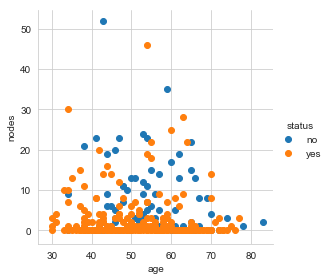

In [8]:
#2 D scatter plot of eatures age and nodes 
sns.set_style("whitegrid");
sns.FacetGrid(hdata, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
print("2D scatter plot ")
print("="*100)
plt.show();

### Observations from 2D scatter plot of age and nodes

1.There is  considerable overlap .From plot we say that pateint having age less than 40 has equal chances of survival and unsurvival.

2.pateints who under gone for surgery but there were no lymph node removed from breast has high rate of survival.

### Model 1.
if age<40 and nodes<=8
then survival after 5 and more


### Model 2 (no limit for age)
if nodes<=1 
then survival after 5 and more

# Pair-plot

2D scatter plot 


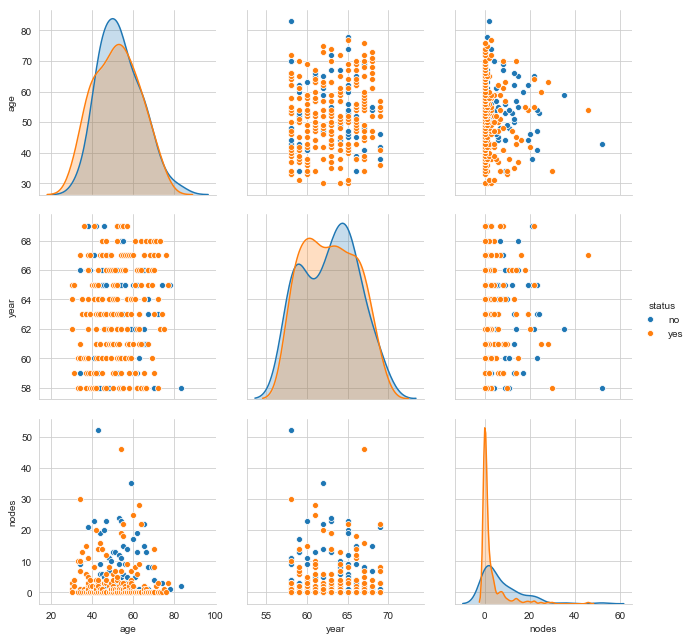

In [42]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hdata, hue="status", height=3);

print("2D scatter plot ")

print("="*100)

plt.show()
# NOTE: the diagnol elements are PDFs for each feature

### Observations from pair plot 

1.There are considerable overlap in almost all plots.

2.From pair plot of year and nodes :we can  find maximum survival of pateints with no or very less number of nodes

3.From pair plot of age and nodes :we can  find maximum survival of pateints with no or very less number of nodes

4.We can find  "if-else" conditions to build a simple model to classify based on number of nodes

5.From above pair plot we can say that "nodes" is important feature of dataset

### model 1 from pair plot of nodes and year
if nodes<=2 then survival after 5 and more

# Univariant analysis,PDF

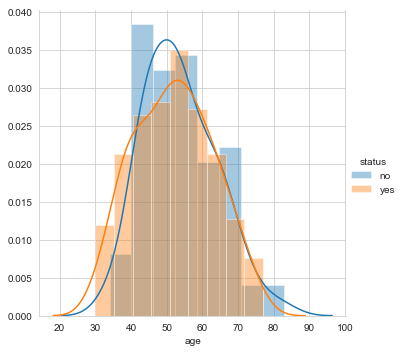

In [10]:

sns.FacetGrid(hdata, hue="status",height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

### Observations

y axis shows count ,x axis shows the interested variable age

1.patents of age betwen 40 to 45 shows high number of patents who were not survived after 5 years.

2.patents of age betwen 50 to 55 shows high number of  patents who were survived after 5 years.

3.There is massive overlap from approximetly age 35 to 75

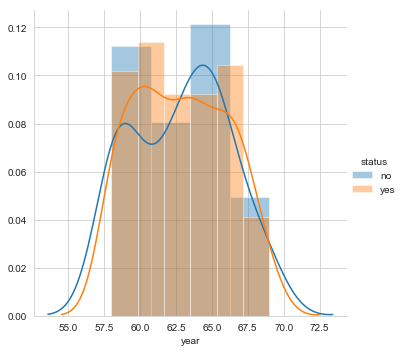

In [11]:
sns.FacetGrid(hdata, hue="status",height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

### Observations

y axis shows count ,x axis shows the interested variable year

1. year approximately from 1964 to 1966 performed highest number of operations for patients who not survived after 5 years

2. year approximately from 1960 to 1963 performed highest number of operations for patients who survived after 5 years

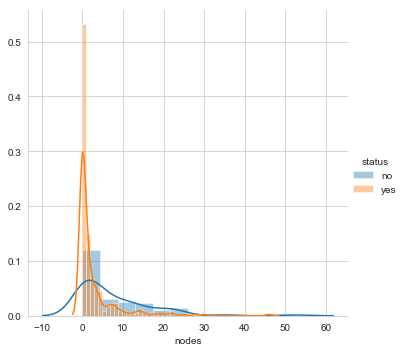

In [12]:
sns.FacetGrid(hdata, hue="status",height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

### Observations

y axis shows count,x axis shows the interested variable nodes

1. histogram bucket from 0 to 3 shows highest number of nodes found in survival patients.

# Cumulative Distribution Function 

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]

CDF and PDF of age and status:


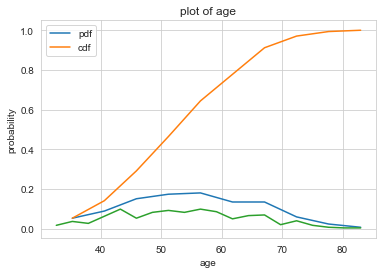

In [51]:
#Plot CDF of age

counts, bin_edges = np.histogram(hdata['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(hdata['age'], bins=20, 
                                 density = True)

pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("plot of age")
plt.xlabel('age')
plt.ylabel('probability')
plt.legend(["pdf","cdf"])
plt.xlabel('age')
plt.ylabel('probability')
print("\nCDF and PDF of age:")
print("="*100)
plt.show();


### Observations

1.There are 19% of pateints having age in range of 50 to 60

2.There are 100% of pateints below age of 85  

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


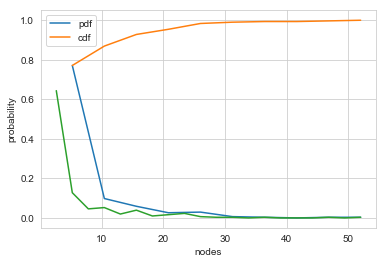

In [14]:
counts, bin_edges = np.histogram(hdata['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(hdata['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.legend(["pdf","cdf"])
plt.xlabel('nodes')
plt.ylabel('probability')
print("\nCDF and PDF of nodes:")
print("="*100)

plt.show();

### Observation

1.There are 98% of pateints having nodes less than 30


Survived and unsurvived CDF and PDF based on  nodes:


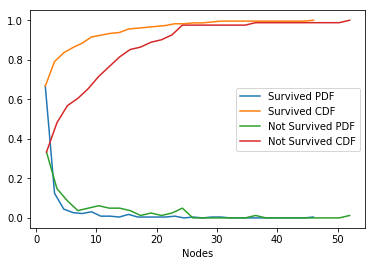

In [14]:

counts_Non, bin_edges_Non = np.histogram(Non_Survived["nodes"], bins=30, density=True)


#PDF and CDF of survived
pdf_survived = counts/sum(counts)
cdf_survived = np.cumsum(pdf_survived)

#PDFand CDF of non survived
pdf_Non_survived = counts_Non/sum(counts_Non)
cdf_Non_survived = np.cumsum(pdf_Non_survived)

# Plot survived and non survived PDF, CDF in a single plot
plt.plot(bin_edges[1:], pdf_survived)
plt.plot(bin_edges[1:], cdf_survived)
plt.plot(bin_edges_Non[1:], pdf_Non_survived)
plt.plot(bin_edges_Non[1:], cdf_Non_survived)
#plt.xticks(np.linspace(0,50,13))
print("\nSurvived and unsurvived CDF and PDF based on  nodes:")

print("="*100)


plt.xlabel("Nodes")

plt.legend(["Survived PDF", "Survived CDF", "Not Survived PDF", "Not Survived CDF" ])
plt.show()

### Observations

1.If nodes are greater than 46 then pateint wont survived

2.If nodes are less than 46 then there are same chances of survived and not survived

3.If nodes are less than 3 then chances of survived is more.

# Mean, Variance and Std-dev

In [26]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("="*100)
print("age",np.mean(hdata["age"]))
print("year",np.mean(hdata["year"]))
print("nodes",np.mean(hdata["nodes"]))
#Mean with an outlier.

print("\nStd-dev:");
print("="*100)
print("age",np.std(hdata["age"]))
print("year",np.std(hdata["year"]))
print("nodes",np.std(hdata["nodes"]))

Means:
age 52.45751633986928
year 62.85294117647059
nodes 4.026143790849673

Std-dev:
age 10.78578520363183
year 3.244090833563246
nodes 7.177896092811152


# Median, Percentile, Quantile, IQR, MAD

In [27]:
print("Median:")
print("="*100)
print("age",np.median(hdata["age"]))
print("year",np.median(hdata["year"]))
print("nodes",np.median(hdata["nodes"]))

print("\nPercentile:")
print("="*100)
print("age",np.percentile(hdata["age"],np.arange(0, 100, 25)))
print("year",np.percentile(hdata["year"],np.arange(0, 100, 25)))
print("nodes",np.percentile(hdata["nodes"],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("="*100)
print("age",robust.mad(hdata["age"]))
print("year",robust.mad(hdata["year"]))
print("nodes",robust.mad(hdata["nodes"]))

Median:
age 52.0
year 63.0
nodes 1.0

Percentile:
age [30.   44.   52.   60.75]
year [58.   60.   63.   65.75]
nodes [0. 0. 1. 4.]

Median Absolute Deviation
age 11.860817748044816
year 4.447806655516806
nodes 1.482602218505602


# Box plot and Whiskers

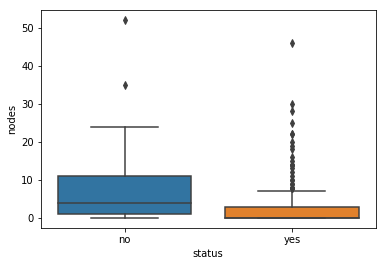

In [10]:

sns.boxplot(x='status',y='nodes', data=hdata)

plt.show()

### Observations

1.Pateints who survived after 5 years having nodes less than ~4 but there are cases of unsurvived too.



Box plot of year and status:


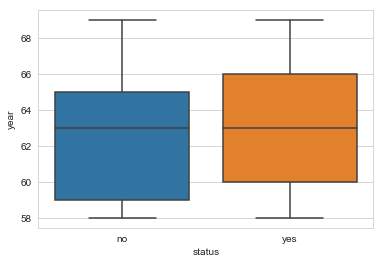

In [44]:
sns.boxplot(x='status',y='year', data=hdata)
print("\nBox plot of year and status:")
print("="*100)
plt.show()

### Observations

1.75% of operations carried before 1966.From which there are cases of survived pateints and unsurvived pateints.



Box plot of age and status:


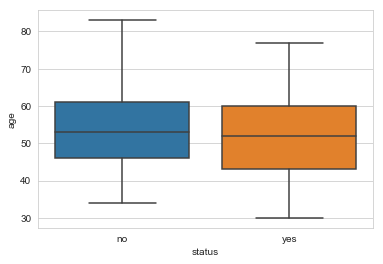

In [46]:
sns.boxplot(x='status',y='age', data=hdata)
print("\nBox plot of age and status:")
print("="*100)
plt.show()

### Observation

1.75 % of pateints who survived  and unsurvived having age less than 63

2.minimum age of survived pateints is less than minimum age of unsurvived pateints.

# Violin plots (Violin plot is combination of pdf and boxplot.)


Violin plot of age and status:


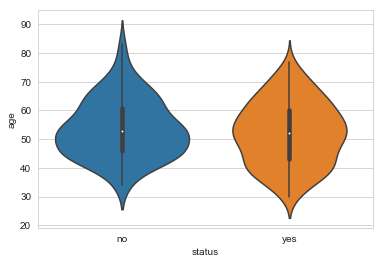

In [47]:
sns.violinplot(x="status", y="age", data=hdata, height=8)
print("\nViolin plot of age and status:")
print("="*100)
plt.show()

### Observations

1.Highest number of pateints who survived after 5 year lie in age value between 50 to 60

2.Highest number of pateints who not survived after 5 year lie in age value between 45 to 55

3.If age is more there are chances of unsurvived.


Violin plot of year and status:


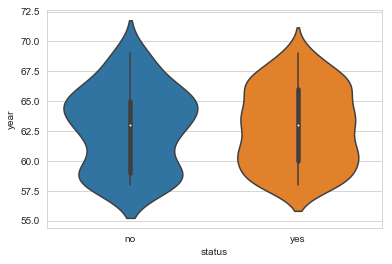

In [48]:
sns.violinplot(x="status", y="year", data=hdata, height=8)
print("\nViolin plot of year and status:")
print("="*100)
plt.show()

### Observation

1.Maximum number of operations takes place in year 1963 to 1966.I which count of unsurvived pateints are more than survived.


Violin plot of nodes and status:


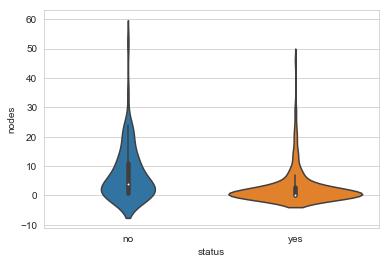

In [49]:
sns.violinplot(x="status", y="nodes", data=hdata, height=8)
print("\nViolin plot of nodes and status:")
print("="*100)
plt.show()

### Observation

1.Pateits having more than 50 nodes shows unsurvived status.

### References
[1]https://en.wikipedia.org/wiki/Lymph_node
  

[2] https://www.cancer.org/cancer/breast-cancer/treatment/surgery-for-breast-cancer/lymph-node-surgery-for-breast-cancer.html 